In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
plt.style.use('classic')

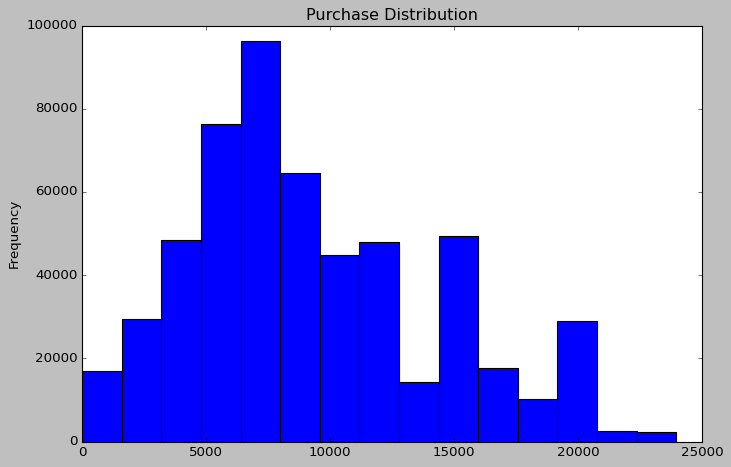

In [ ]:
purchase_d=data['Purchase']
purchase_d.plot(kind='hist',bins=15, 
       edgecolor = 'black',figsize=(10,6.5),title='Purchase Distribution')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25c00f640>],
      dtype=object)

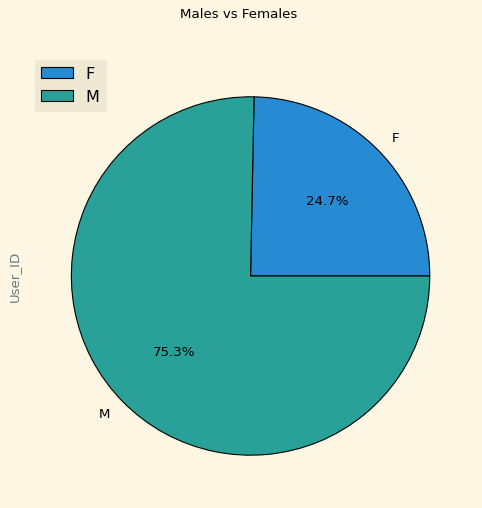

In [ ]:
gender_count=data[['Gender','User_ID']].groupby('Gender').count()
gender_count
plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Males vs Females',figsize=(12,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25bb280a0>],
      dtype=object)

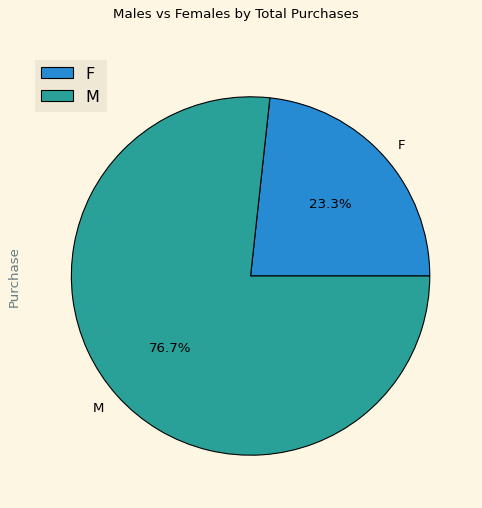

In [ ]:
gender_pu=data[['Gender','Purchase']].groupby('Gender').sum()
gender_pu
gender_pu.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,7),title='Males vs Females by Total Purchases')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25baff3a0>],
      dtype=object)

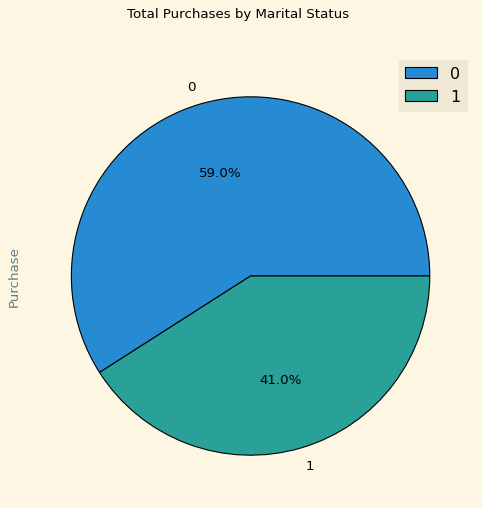

In [ ]:
status_pu=data[['Marital_Status','Purchase']].groupby('Marital_Status').sum()
status_pu.plot(kind='pie',title='Total Purchases by Marital Status',autopct='%1.1f%%',subplots=True,figsize=(12,7))

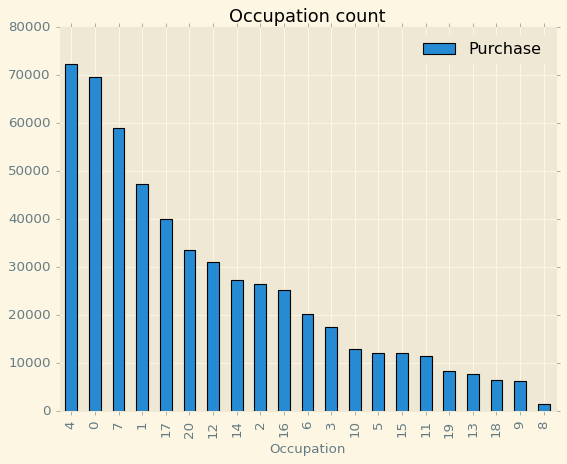

In [ ]:
ocu_count=data[['Occupation','Purchase']].groupby('Occupation').count()
ocu_count=ocu_count.sort_values(by='Purchase',ascending=False)
ocu_count.plot(kind='bar',title='Occupation count')

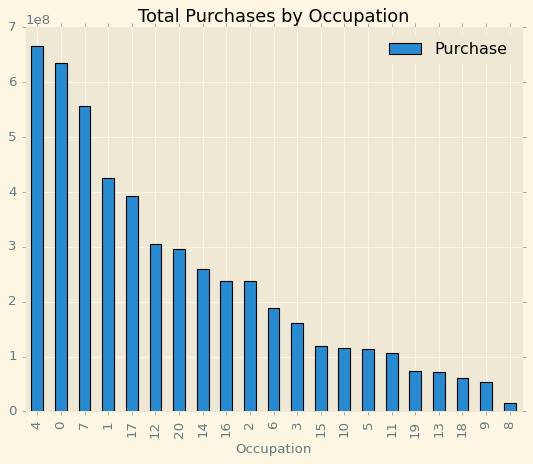

In [ ]:
ocu_pu=data[['Occupation','Purchase']].groupby('Occupation').sum()
ocu_pu=ocu_pu.sort_values(by='Purchase',ascending=False)
ocu_pu.plot(kind='bar',title='Total Purchases by Occupation')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25b8f0d90>],
      dtype=object)

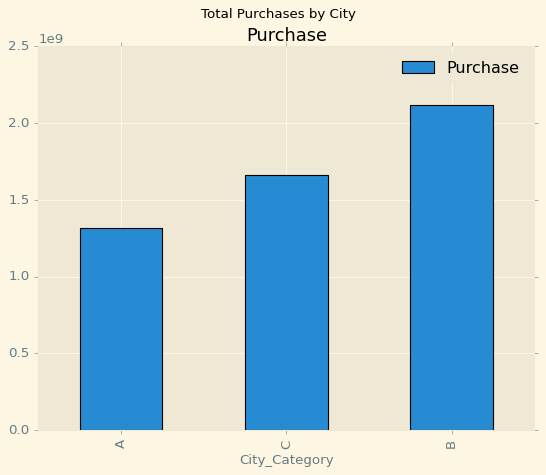

In [ ]:
city_pu=data[['City_Category','Purchase']].groupby('City_Category').sum()
city_pu=city_pu.sort_values(by='Purchase')
city_pu.plot(kind='bar',subplots=True,title='Total Purchases by City')

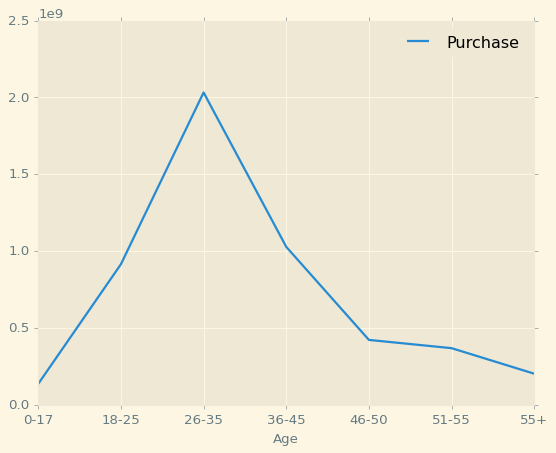

In [ ]:
age_pu=data[['Age','Purchase']].groupby('Age').sum()
age_pu.plot()

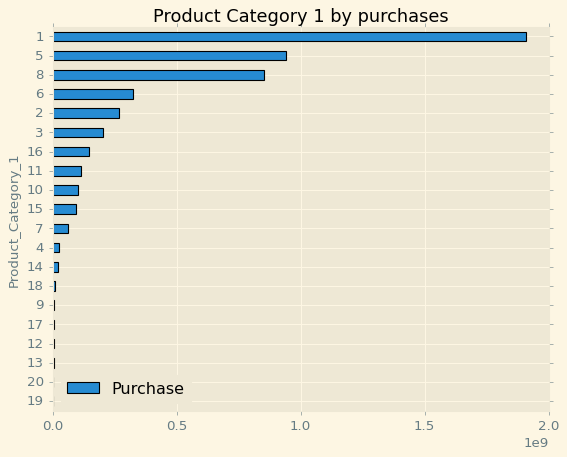

In [ ]:
prod_pu1=data[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
prod_pu1=prod_pu1.sort_values(by='Purchase')
prod_pu1.plot(kind='barh',title='Product Category 1 by purchases')

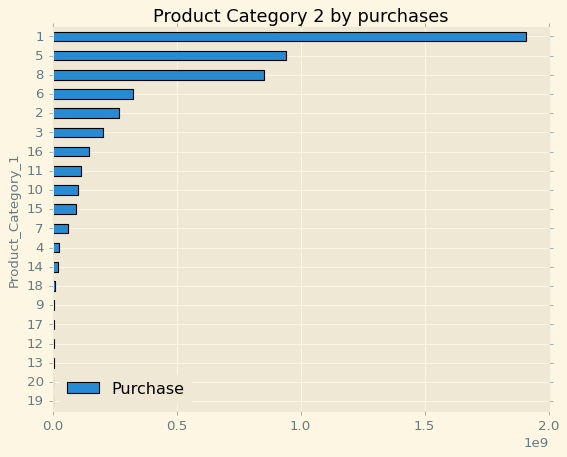

In [ ]:
prod_pu2=data[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
prod_pu2=prod_pu1.sort_values(by='Purchase')
prod_pu2.plot(kind='barh',title='Product Category 2 by purchases')

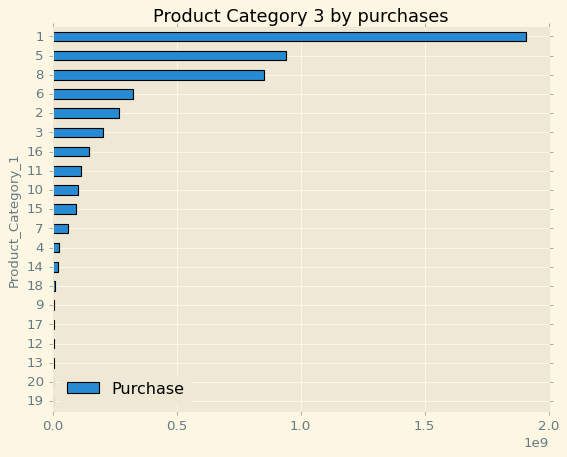

In [ ]:
prod_pu3=data[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
prod_pu3=prod_pu1.sort_values(by='Purchase')
prod_pu3.plot(kind='barh',title='Product Category 3 by purchases')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25b5ec550>],
      dtype=object)

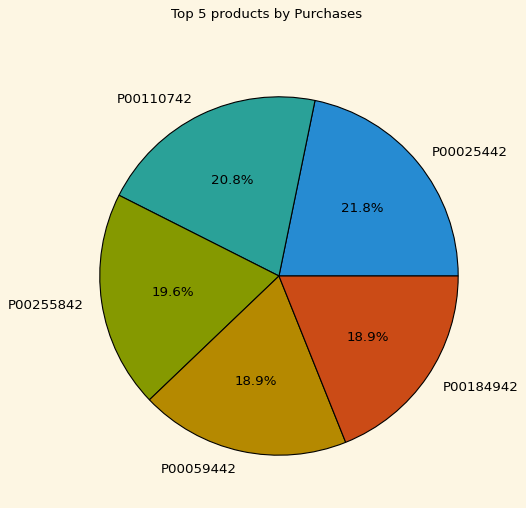

In [ ]:
top_prod=data[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_prod=top_prod.sort_values(by='Purchase',ascending=False)
top_prod=top_prod.head(5)
top_prod.plot(kind='pie',title='Top 5 products by Purchases',subplots=True,autopct='%1.1f%%',legend=False,ylabel='',figsize=(12,7))

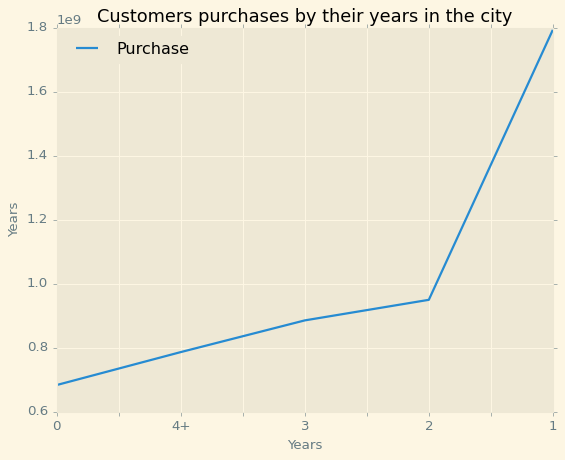

In [ ]:
city_dur=data[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').sum()
city_dur=city_dur.sort_values(by='Purchase')
city_dur.plot(xlabel='Years',ylabel='Years',title='Customers purchases by their years in the city')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



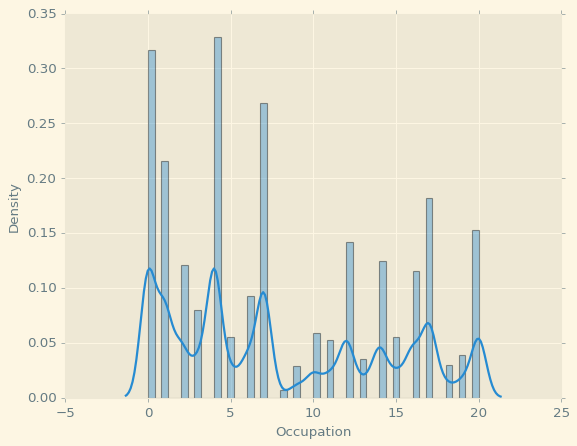

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



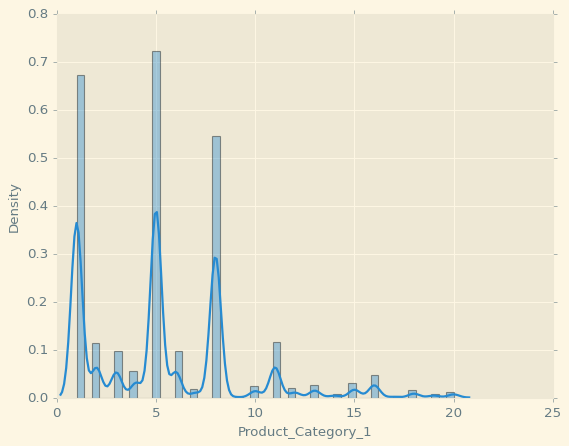

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



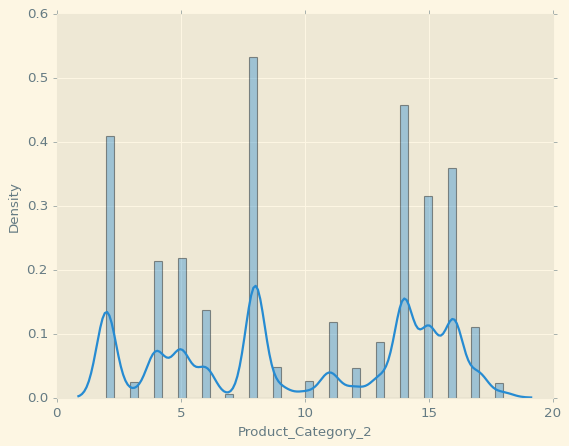

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



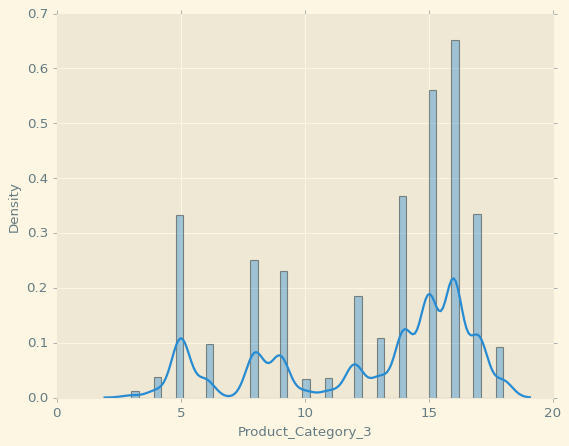

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



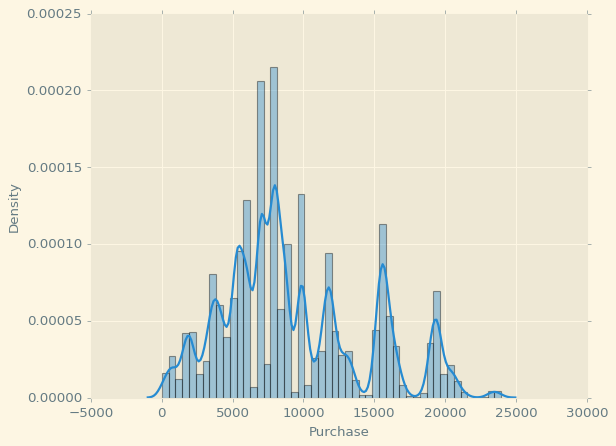

In [ ]:
num_feat = [
           "Occupation",
           "Product_Category_1",
           "Product_Category_2",
           "Product_Category_3",
           "Purchase"
           ]


for col in data[num_feat]:
    plt.figure()
    sns.distplot(data[col])
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



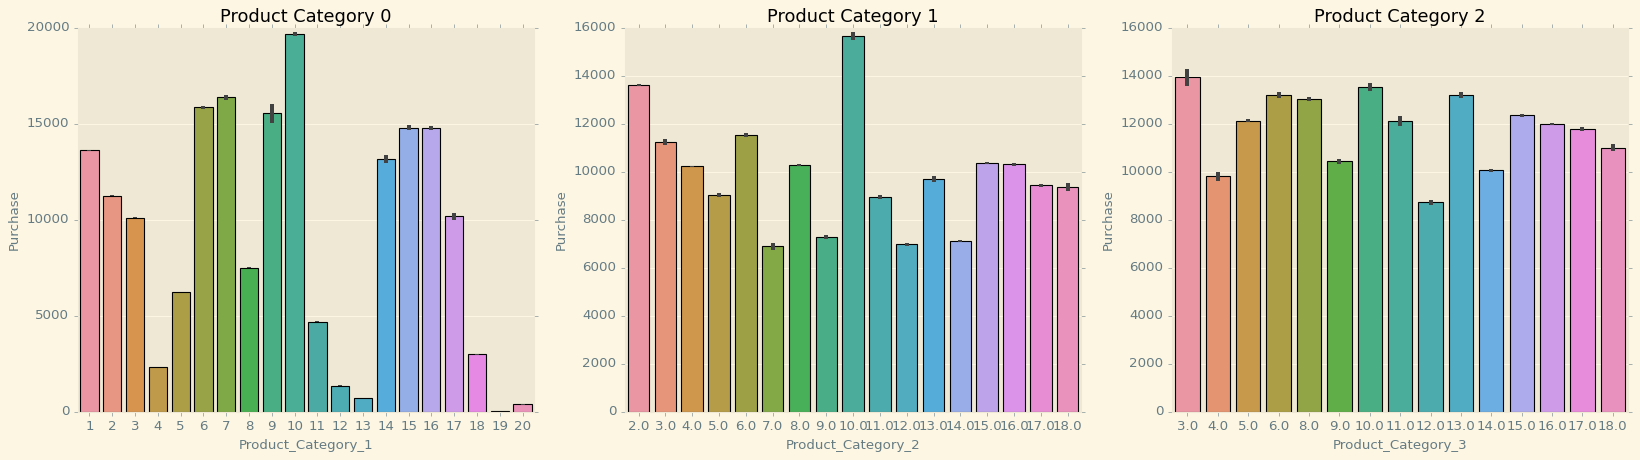

In [ ]:
var_list = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]

plt.figure(figsize = (25,6))

for i in np.arange(0,3):
    plt.subplot(1,3,i+1)
    sns.barplot(data[var_list[i]], data.Purchase)
    plt.title("Product Category {}".format(i))
    
plt.show()

In [ ]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
data.duplicated().sum()

0

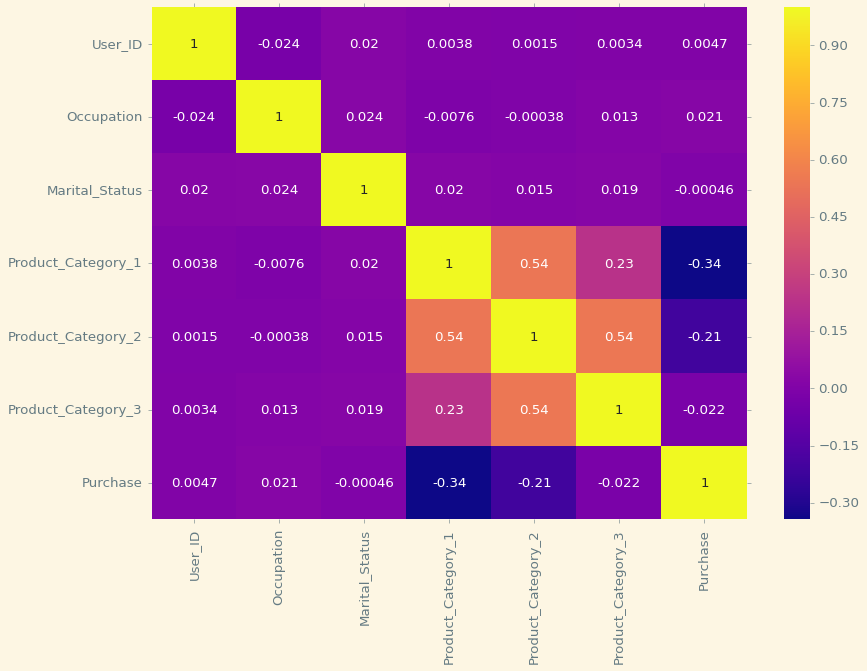

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

In [ ]:
data['Gender']=pd.factorize(data.Gender)[0]
data['Age']=pd.factorize(data.Age)[0]
data['City_Category']=pd.factorize(data.City_Category)[0]
data['Stay_In_Current_City_Years']=pd.factorize(data.Stay_In_Current_City_Years)[0]
data['Product_ID']=pd.factorize(data.Product_ID)[0]
data['User_ID']=pd.factorize(data.User_ID)[0]
data['Product_Category_1']=pd.factorize(data.Product_Category_1)[0]
data['Product_Category_2']=pd.factorize(data.Product_Category_2)[0]
data['Product_Category_3']=pd.factorize(data.Product_Category_3)[0]


In [ ]:
X= data.values[:,0:11]
Y= data.values[:, 11]

In [ ]:
X= preprocessing.scale(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
score = rf.score(X_train,y_train)
score

0.9581729001039829

In [ ]:
y_pred = rf.predict(X_test)
rscore=r2_score(y_test, y_pred)
rscore

0.6984075142140937

In [ ]:
data['Prediction']=rf.predict(X)

In [ ]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prediction
0,0,0,0,0,10,0,0,0,0,-1,-1,8370,9724.97
1,0,1,0,0,10,0,0,0,1,0,0,15200,14953.13
2,0,2,0,0,10,0,0,0,2,-1,-1,1422,1438.78
3,0,3,0,0,10,0,0,0,2,1,-1,1057,1230.79
4,1,4,1,1,16,1,1,0,3,-1,-1,7969,7719.38
5,2,5,1,2,15,0,2,0,1,2,-1,15227,14354.45
6,3,6,1,3,7,2,0,1,1,3,1,19215,14880.99
7,3,7,1,3,7,2,0,1,1,4,-1,15854,15227.59
8,3,8,1,3,7,2,0,1,1,5,-1,15686,14824.47
9,4,9,1,2,20,0,3,1,3,-1,-1,7871,7182.50


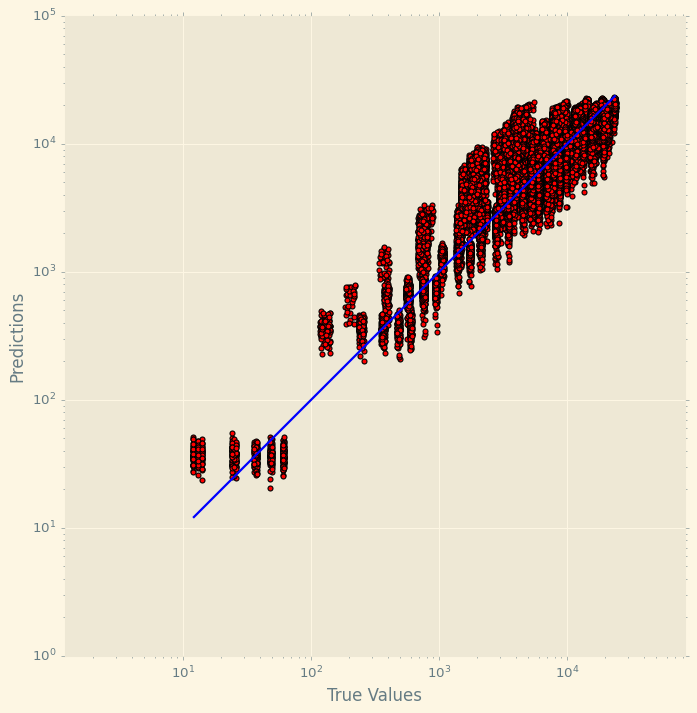

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='red')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show() 

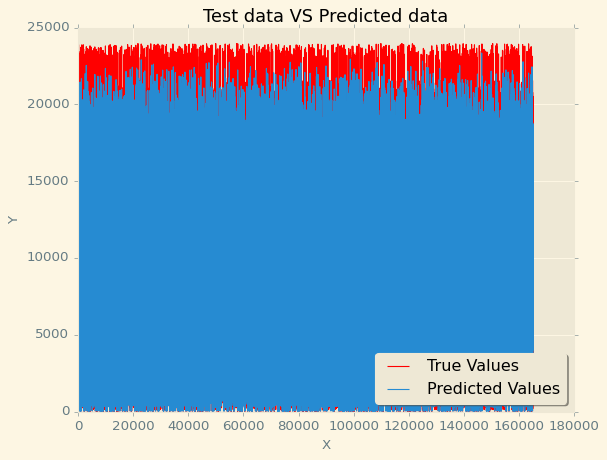

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth = '1', label="True Values", c='red')
plt.plot(x_ax, y_pred, linewidth = '1', label="Predicted Values")
plt.title("Test data VS Predicted data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right',fancybox=True, shadow=True)
plt.show() 

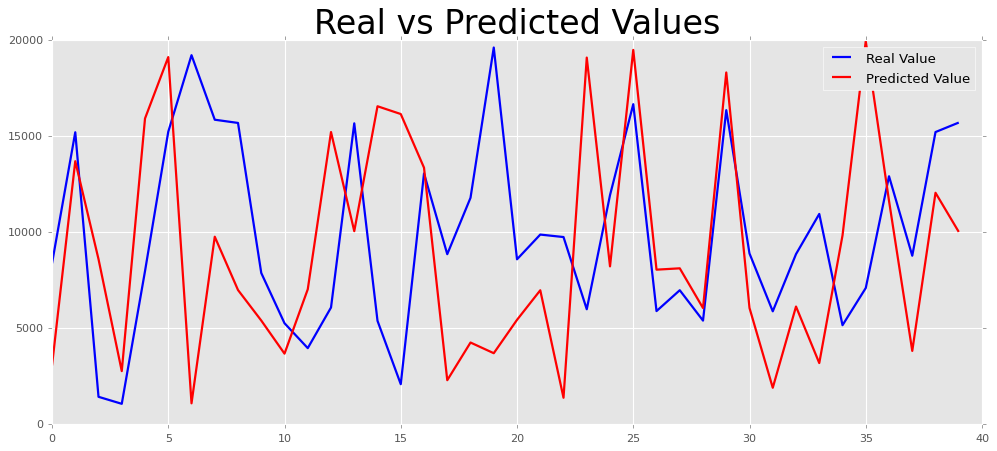

In [ ]:
 y_pred = pd.DataFrame(data["Purchase"])

plt.style.use("ggplot")
plt.figure(figsize = (15,6))

plt.plot(y_pred[0:40]["Purchase"], color = "b", label = "Real Value")
plt.plot(y_test[0:40], color = "r", label = "Predicted Value")
plt.legend()
plt.title("Real vs Predicted Values", fontsize = 30)
plt.show()